# Laboratorio 2 

## Integrantes

Nicolas Diaz Montaña - n.diaz9 - 202021006
<br>
Julio Peña - j.penat - 201616539
<br>
Sebastian Casanova - s.casanovao - 202115116

## Objetivos

- Construir modelos analíticos para estimar una variable objetivo continua a partir de un conjunto de variables observadas.


- Comprender el proceso para la construcción de modelos analíticos que responden a una tarea de regresión.


- Automatizar el proceso de construcción de modelos analíticos con el uso de pipelines de tal forma que puedan ser usados en ambientes de producción.


- Extraer información útil para el negocio a partir de los resultados de los modelos de regresión.

## Contexto del Negocio

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de <u>**crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un altonúmero de muertes por cáncer aunque no haya registros completos u oficiales.**</u>
<br><br>
Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

En caso de que no se cuente con la librería se debe ejecutar previamente este paso pero de hacerlo se debe ignorar:

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

import joblib

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [6]:
cancer_df = pd.read_csv("./data/202410_Laboratorio 2 - Regresión_train_data.csv")

 ## 1. Entendimiento de Datos

 ### 1.1. Entendimientos Basicos

Usando el metodo `shape` se logran evidenciar que dentro del CONJUNTO DE DATOS se encuentran 2132 FILAS (REGISTROS) y 34 COLUMNAS (VARIABLES).

In [7]:
cancer_df.shape

(2132, 34)

Por medio de la funcion `describe()` se realizo un analisis estadistico descriptivo, visualizandolo en una tabla. De momento no se visualiza incongruencias 

In [8]:
cancer_df.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,528.000000,2132.000000,2132.000000,2132.000000,2017.000000,2132.000000,2132.000000,1704.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,2.479013,51.756285,18.134897,34.981660,41.151705,6.201173,34.949578,13.225797,54.119137,7.843574,64.393011,48.407688,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,0.421538,6.925242,8.091987,9.024105,11.046405,4.628540,7.056699,5.395211,8.398898,3.448596,10.670887,9.985504,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.700000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,2.360000,47.775000,12.700000,29.200000,34.000000,3.100000,30.600000,9.300000,48.600000,5.500000,57.175000,41.275000,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,2.500000,52.300000,17.100000,34.700000,40.600000,5.400000,35.400000,12.300000,54.400000,7.600000,65.300000,48.800000,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,2.630000,56.500000,22.425000,40.700000,46.725000,8.300000,39.800000,16.100000,60.300000,9.700000,72.100000,55.500000,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,3.970000,72.500000,64.100000,65.700000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.200000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


Ahora se revisan las caracteristicas de los datos: **completitud y tipo de dato** por medio de la funcion `info`. Con esto se evicencia, que las columnas `PctSomeCol18_24`, `PctEmployed16_Over` y `PctPrivateCoverageAlone` tienen **nulos**. Por otro lado, parece que los tipos son congruentes con el tipo de variable que les corresponden siendo la mayoria float64 o int64. Siendo la exepcion la columna `Geography` que es de tipo object al tener que necesitar palabras para describir el condado y en que estado se encuentra ese condado.

In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24            

In [10]:
columnas_con_nulos = cancer_df.columns[cancer_df.isnull().any()].tolist()
print(columnas_con_nulos)

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']


Al explorara las variables no numericas, que este caso solamente seria la variable `Geography` como se denoto anteriormente, podemos ver que solo existen 10 condados diferentes dentro del Dataframe.

In [11]:
nom_cols_no_num = cancer_df.select_dtypes(include = ['object']).columns

cancer_df[nom_cols_no_num].describe()

,binnedInc,Geography
count,2132,2132
unique,10,2132
top,"(37413.8, 40362.7]","Gregory County, South Dakota"
freq,223,1


### 1.2.  Preseleccion de Variables

En principio nuestra **variable objetivo** es la columna `deathRate` y todas las 33 columnas restantes son nuestras posibles **variables de entrada**. Ahora toca realizar una busqueda de relaciones de las variables con la variable objetivo y entre las mismas para poder generar hipotesis.
<br><br>
En un principo vamos a guardar las variables de entrada para facilitar la busqueda.

In [12]:
features = list(col for col in cancer_df.columns if col != 'deathRate')
print(features)

sub1_feature = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent']
sub2_feature = ['studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography']
sub3_feature = ['AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24']
sub4_feature = ['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone']
sub5_feature = ['PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian']
sub6_feature = ['PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


### 1.2.1.  Búsqueda de relaciones con la variable objetivo

Si se logra visualizar o cuantificar altas correlaciones entre las variables de entrada y la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.
<br><br>
En este sub grupo (1) de `features` parece que las variables que mas tiene correlacion con la variable objetivo son `incidenceRate`, `medIncome`y `povertyPercent`.

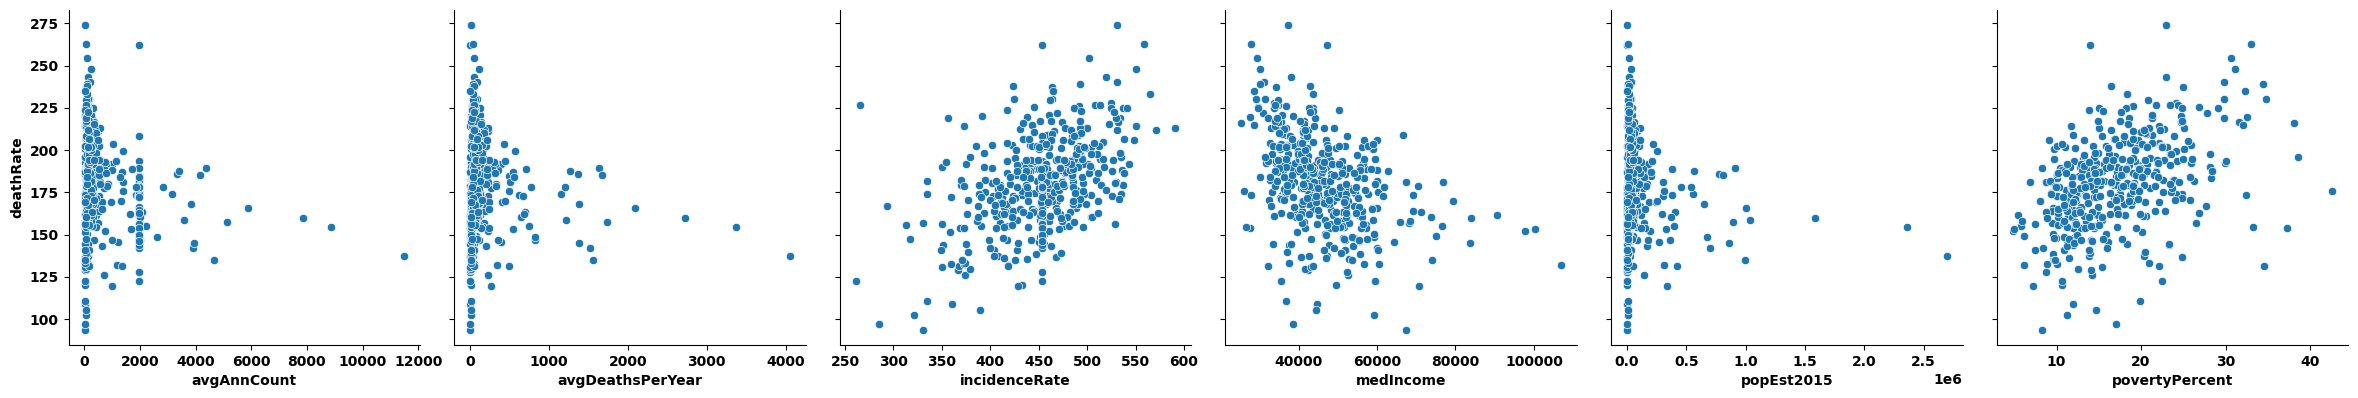

In [13]:
# Sub-Grupo 1
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub1_feature, kind="scatter")

En este sub grupo (2) de `features` parece que no hay variables que se relacionen con la variable objetivo.

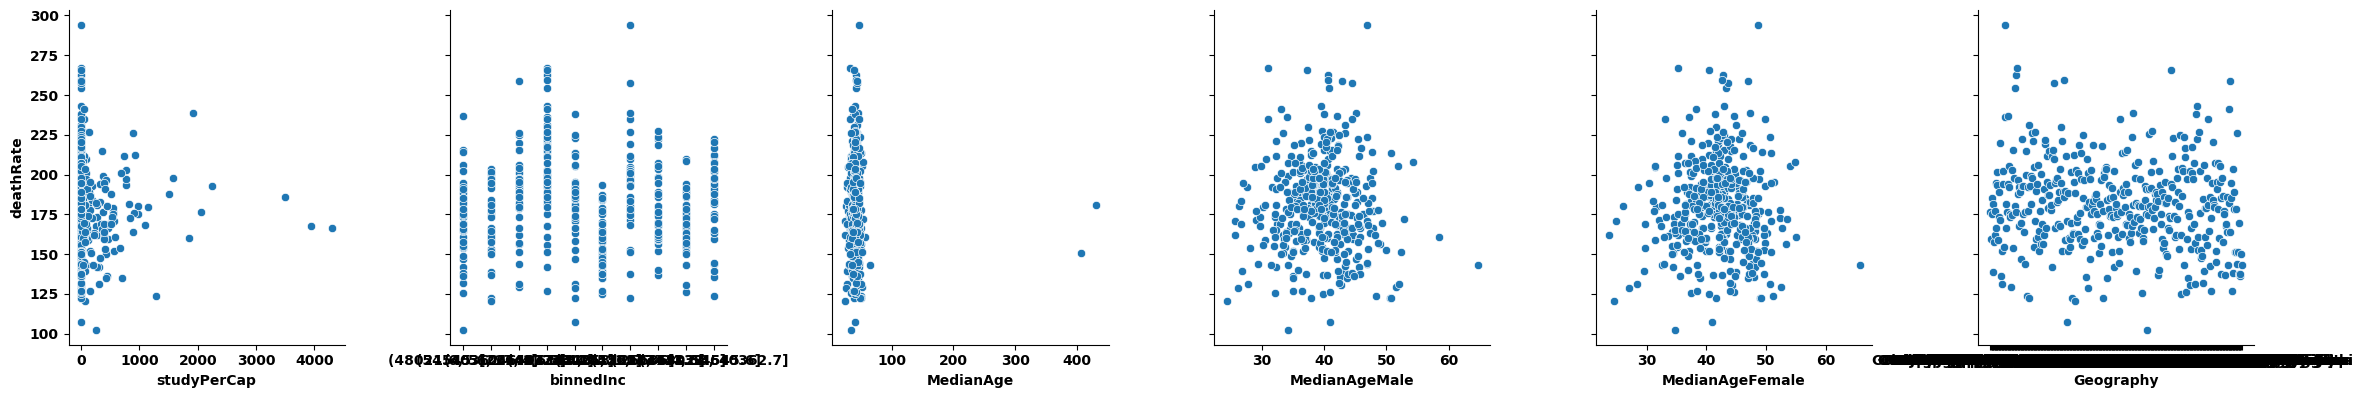

In [19]:
# Sub-Grupo 2
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub2_feature, kind="scatter")

En este sub grupo (3) de `features` parece que no hay variables que se relacionen con la variable objetivo. A su vez por la falta del ~75% de los datos de la columna `PctSomeCol18_24`, no se puede ver con exactitud la relacion que tiene con la variable objetivo.

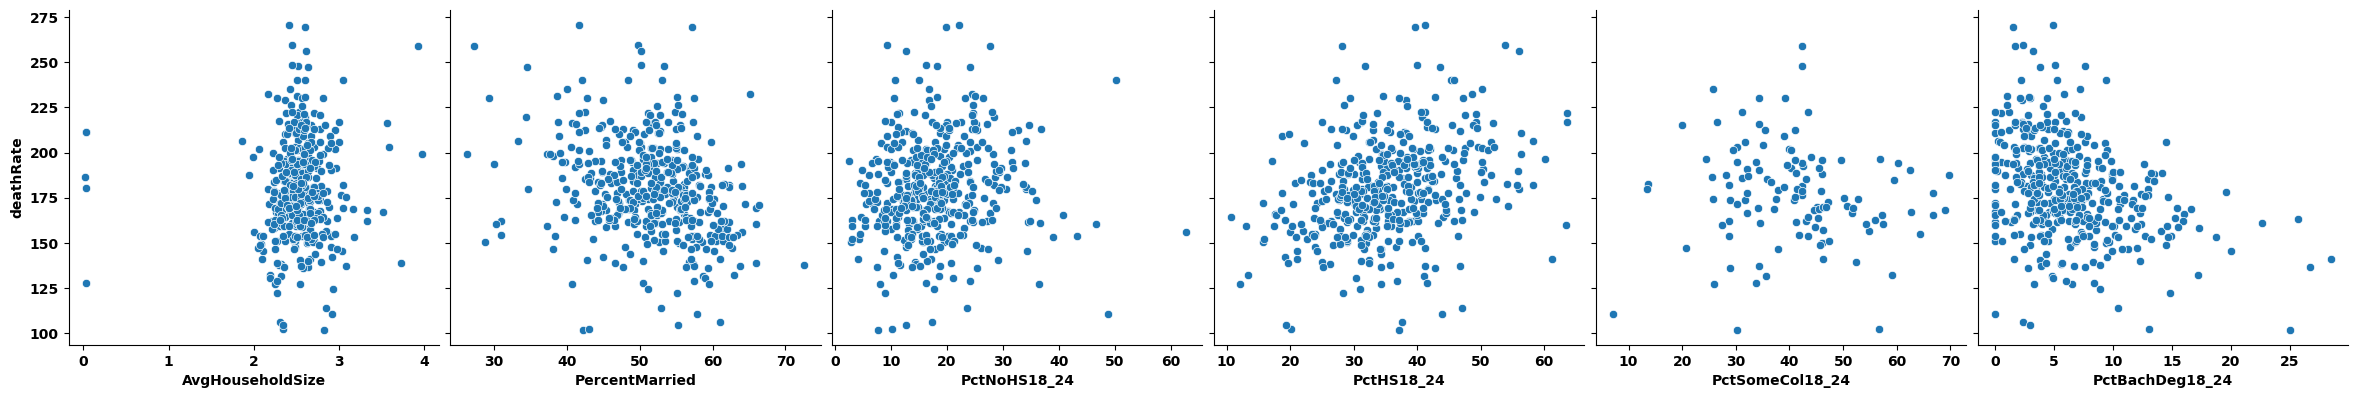

In [15]:
# Sub-Grupo 3
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub3_feature, kind="scatter")

En este sub grupo (4) de features parece que todas las variables si tiene relacion con la variable objetivo. Esta variables son `PctHS25_Over`, `PctBachDeg25_Over`, `PctEmployed16_Over`, `PctUnemployed16_Over`, `PctPrivateCoverage`y `PctPrivateCoverageAlone`.

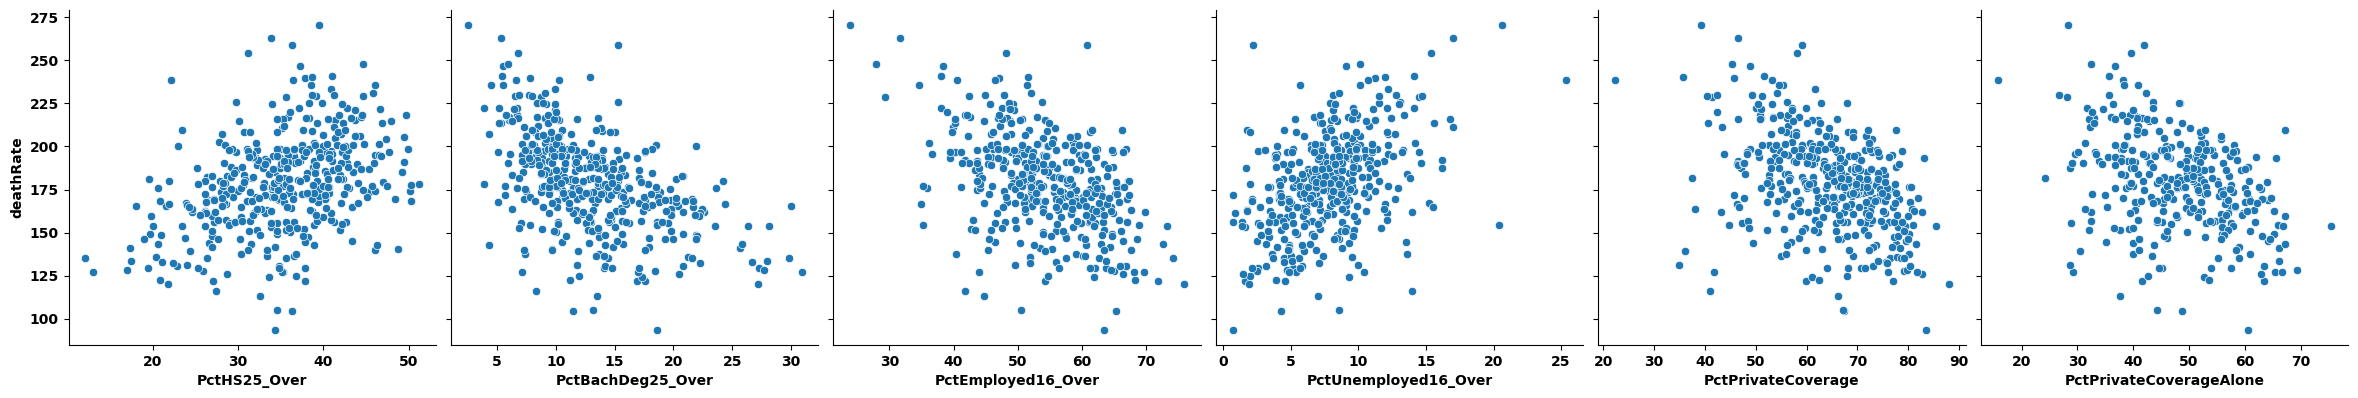

In [16]:
# Sub-Grupo 4
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub4_feature, kind="scatter")

En este sub grupo (5) de features solo dos de las variables si tienen relacion con la variable objetivo. Esta variables son `PctPublicCoverage`y `PctPublicCoverageAlone`.

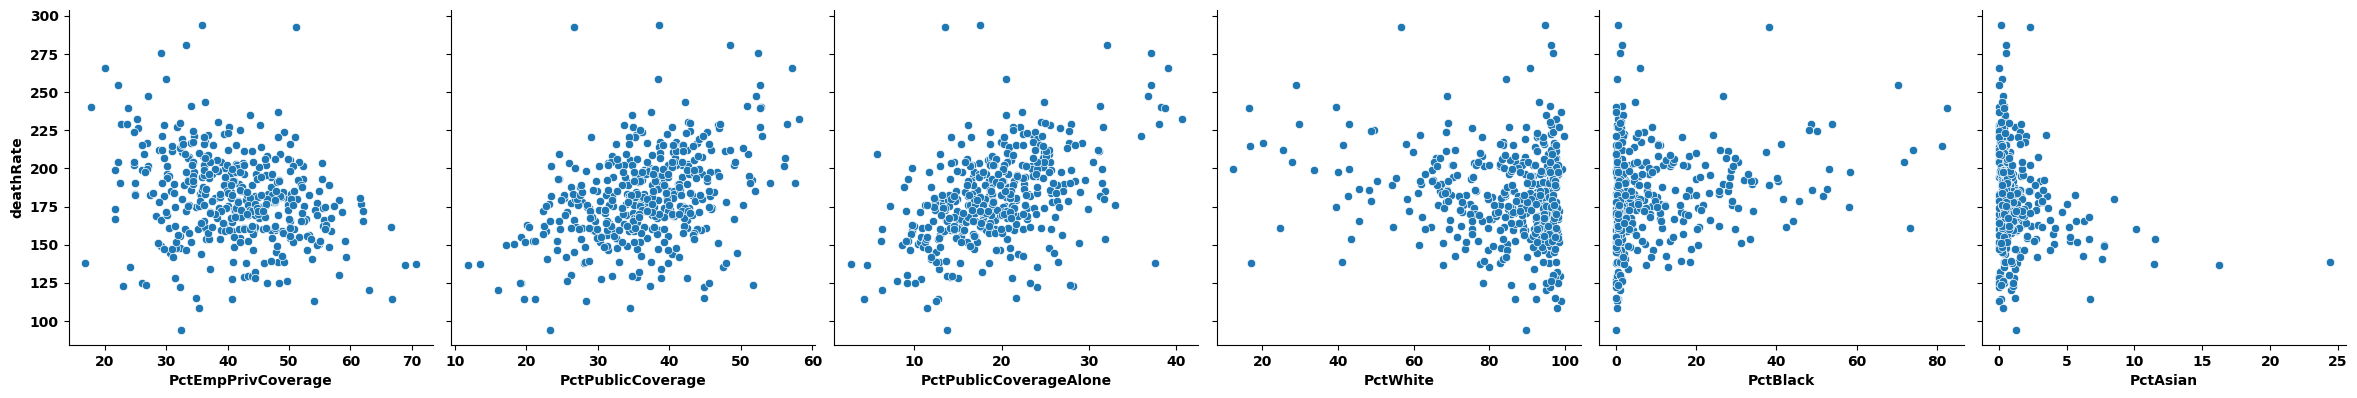

In [17]:
# Sub-Grupo 5
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub5_feature, kind="scatter")

En este sub grupo (6) de features parece que no hay variables que se relacionen con la variable objetivo.

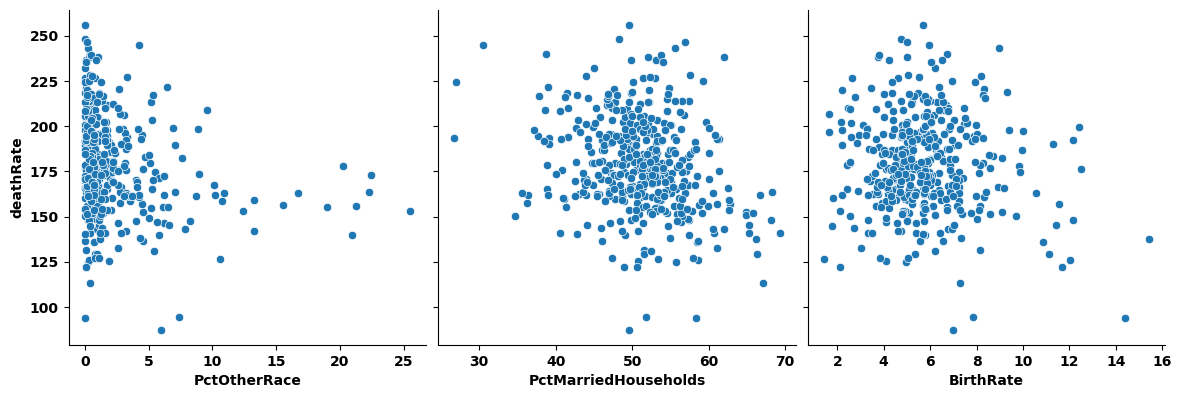

In [18]:
# Sub-Grupo 6
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub6_feature, kind="scatter")

#### Analisis

Se puede ver que las variables mas relacionadas con la variable objetivo `deathRate` son: `incidenceRate`, `medIncome`, `povertyPercent`, `PctHS25_Over`, `PctBachDeg25_Over`, `PctEmployed16_Over`, `PctUnemployed16_Over`, `PctPrivateCoverage`, `PctPrivateCoverageAlone`, `PctPublicCoverage`y `PctPublicCoverageAlone`. Teniendo eso en cuenta, se utilizaran estas variables para el siguiente analisis de correlacion entre las variables. De momento se puede sacar la hipotesis que existe una correlacion entre el nivel y estabilidad economica para pagar un tratamiento de un condado y su tasa de muertes por cancer.


### 1.2.2. Búsqueda de relaciones con la variable objetivo

Se va realizar el analisis con heatmap para ver las relaciones entre las variables.

<Axes: >

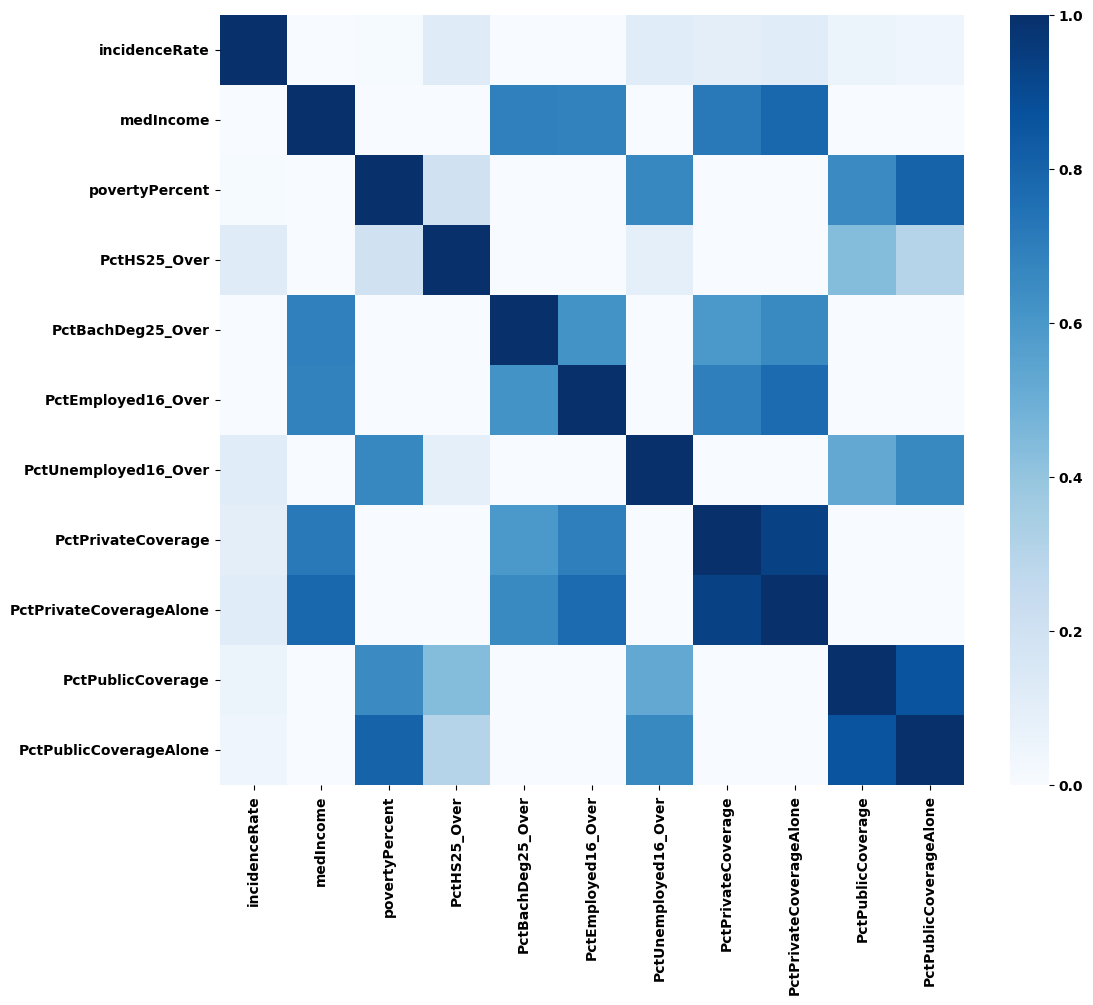

In [20]:
### Se van a utilizar las variables que se escogieron en el punto anterior.

ch_features = ["incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverage", "PctPrivateCoverageAlone", "PctPublicCoverage", "PctPublicCoverageAlone"]

plt.figure(figsize=(12, 10))
sns.heatmap(cancer_df[ch_features].corr(), cmap="Blues", vmin=0, vmax=1)

Un buen punto de corte (empírico) para decidir si descartar una variable debido a su alta correlación con otra es ~ $|0.8|$. En este caso se puede ver que las variables con una alta correlacion entre si, son `PctPrivateCovarage`, `PctPrivateCovarageAlone`, `PctPublicCovarage`y `PctPublicCovarageAlone`. Teniendo en cuenta el objetivo de la  OMS de permitirle a los gobiernos nacionales y locales iniciar estrategias contra el cancer por medio del modelo, las variables que deberian eliminarse son `PctPrivateCovarage` y `PctPublicCovarage` dado a que estos describen el porcentaje de residentes del condado con cobertura de salud privada o publica por el empleador. El razonamiento se debe a que el gobierno deberia tener interes sobre los porcentajes donde estan colaborando con la salud de sus ciudadano y donde no para poder crear las estrategias que estan buscando. Quedando el heatmap actualizado de la siguiente manera.

<Axes: >

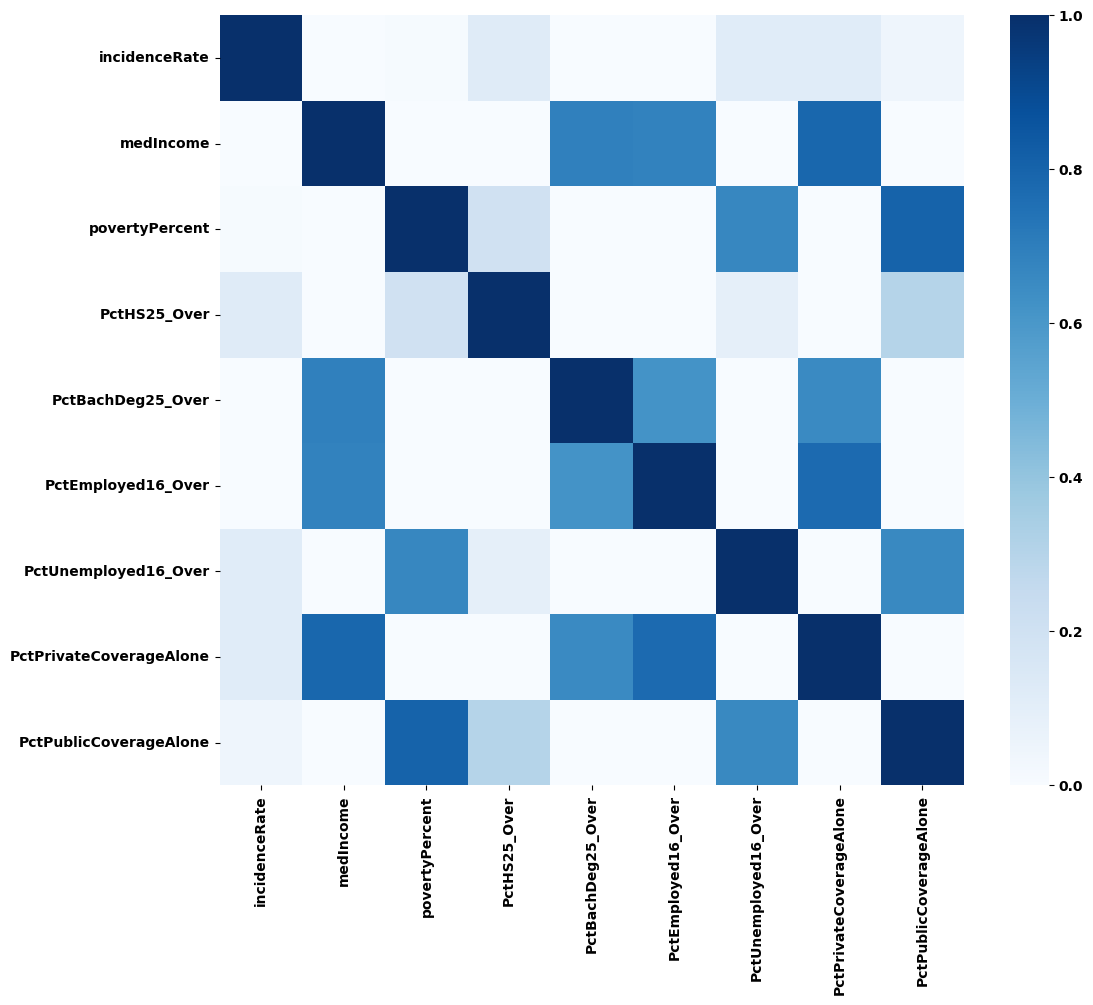

In [21]:
### Se van a utilizar las variables que se escogieron en el punto anterior.

final_features = ["incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverageAlone", "PctPublicCoverageAlone"]

plt.figure(figsize=(12, 10))
sns.heatmap(cancer_df[final_features].corr(), cmap="Blues", vmin=0, vmax=1)

###  1.3. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez. En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.3.1. Completitud - Análisis de valores nulos o vacíos

Como se evidencio anteriormente se puede ver que las columnas afectadas por nulos son:`PctPrivateCoverageAlone` y `PctEmployed16_Over`; teniendo porcentajes de ~20% y ~5% respectivamente. Aqui lo que podemos ver es que una  buena cantidad de los datos de `PctPrivateCoverageAlone`contienen nulos por ende eliminarlos pueda estar en debate por que estariamos perdiendo una cantidad significante de registros.

In [22]:
# Cálculo de porcentaje de valores nulos por columna
((cancer_df[["deathRate"]+final_features].isnull().sum()/cancer_df.shape[0])).sort_values(ascending=False)

PctPrivateCoverageAlone    0.20075
PctEmployed16_Over         0.05394
deathRate                  0.00000
incidenceRate              0.00000
medIncome                  0.00000
povertyPercent             0.00000
PctHS25_Over               0.00000
PctBachDeg25_Over          0.00000
PctUnemployed16_Over       0.00000
PctPublicCoverageAlone     0.00000
dtype: float64

### 1.3.2.  Unicidad

Afortunadamente, no hay filas  repetidas con las variables seleccionadas dentro del Dataframe.

In [23]:
print('Total de filas repetidas:', cancer_df[final_features].duplicated(keep = False).sum())

Total de filas repetidas: 0


### 1.3.3. Consistencia

Revisaremos las variables de tipo porcentaje. Utilizando la funcion `describe()` podemos ver que tiene un rango entre [0 - 100]% y que todas los datos no parecen salirse de ese rango.

In [24]:
name_cols_pct = ['povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverageAlone', 'PctPublicCoverageAlone']
cancer_df[name_cols_pct].describe()

,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverageAlone,PctPublicCoverageAlone
count,2132.000000,2132.000000,2132.000000,2017.000000,2132.000000,1704.000000,2132.000000
mean,16.889681,34.949578,13.225797,54.119137,7.843574,48.407688,19.282786
std,6.415614,7.056699,5.395211,8.398898,3.448596,9.985504,6.136426
min,3.200000,7.500000,2.500000,17.600000,0.700000,15.700000,2.600000
25%,12.200000,30.600000,9.300000,48.600000,5.500000,41.275000,14.900000
50%,15.900000,35.400000,12.300000,54.400000,7.600000,48.800000,18.900000
75%,20.300000,39.800000,16.100000,60.300000,9.700000,55.500000,23.200000
max,47.400000,54.800000,42.200000,80.100000,29.400000,78.200000,46.600000


### 1.3.4.  Validez

Ahora utilizando un boxplot, lo que podemos notar es que hay una evidencia grande de outliers que pueden sesgar el resultado de la regresion. Lo mejor puede ser una transformación de datos, que podría ayudar a corregir esto y hacer que la distribución sea más simétrica.

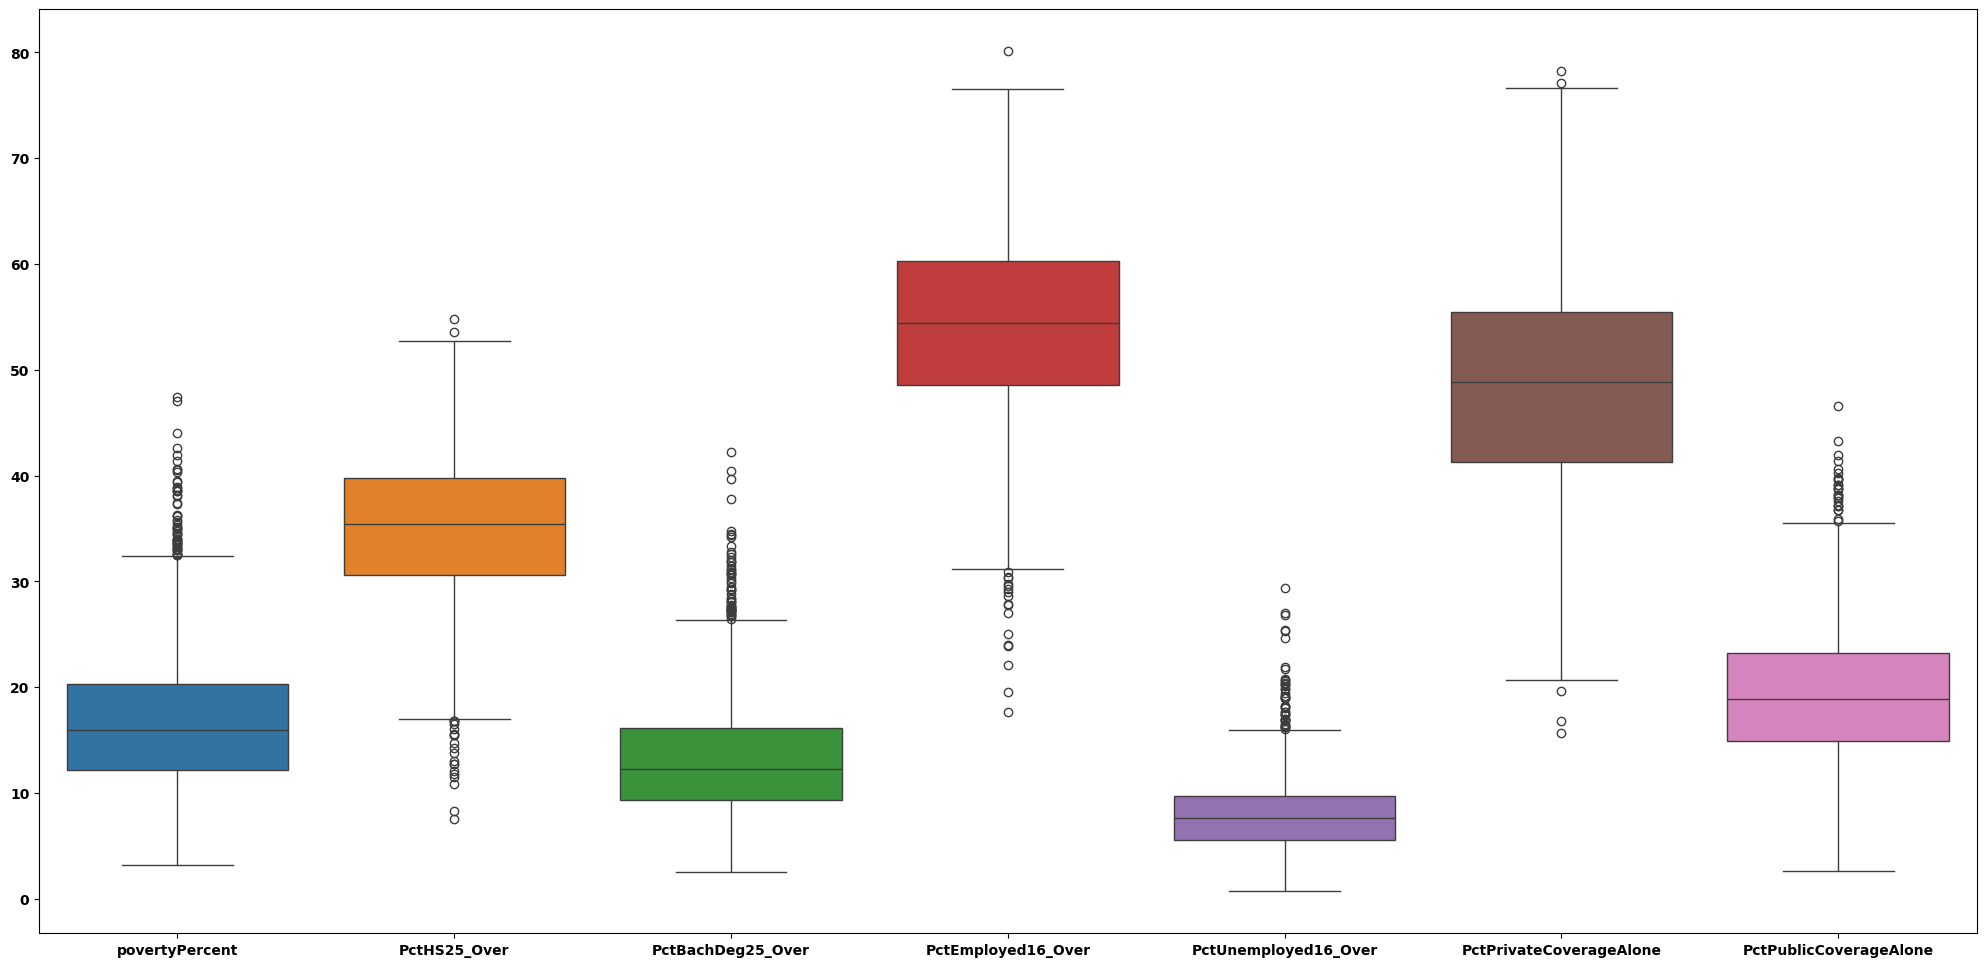

In [25]:
#Visualización de todas las variables numéricas que representen porcentaje de tipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df[name_cols_pct], orient="v")

## 2. Preparacion de datos.

### 2.1. Eliminar nulos - Datos de Entrenamiento

En el caso de los datos de la columna `PctEmployed16_Over`, se puede eliminar los registros que contengan nulos debido a que solo representan un ~5% aproximado de los datos. No habra un cambio significativo a la hora de hacer la regresion.

In [26]:
cancer_df.dropna(subset=['PctEmployed16_Over'], inplace=True)

Ahora en el caso de la columna `PctPrivateCoverageAlone` es un poco mas complicado, dado a que los registros con datos nulos representan un 20% de la totalidad de los datos. Entonces lo que se va hacer es darles la media de actual que seria ~48.41, para no tener que perder informacion relevante para el modelado.

In [27]:
cancer_df['PctPrivateCoverageAlone'].fillna(48.41, inplace=True)

C:\Users\elfue\AppData\Local\Temp\ipykernel_21388\3792396807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_df['PctPrivateCoverageAlone'].fillna(48.41, inplace=True)


Se comprueba de que no haya nulos.

In [28]:
((cancer_df[["deathRate"]+final_features].isnull().sum()/cancer_df.shape[0])).sort_values(ascending=False)

deathRate                  0.0
incidenceRate              0.0
medIncome                  0.0
povertyPercent             0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverageAlone    0.0
PctPublicCoverageAlone     0.0
dtype: float64

### 2.2. Transformacion de Datos - Datos de Entrenamiento

Como se menciono antes se realizara una transformacion de datos por medio de la aplicacion de la raiz cuadrada para ayudar a distribuir los datos y hacer que la esta sea más simétrica.

In [29]:
cancer_df[name_cols_pct] = np.sqrt(cancer_df[name_cols_pct])

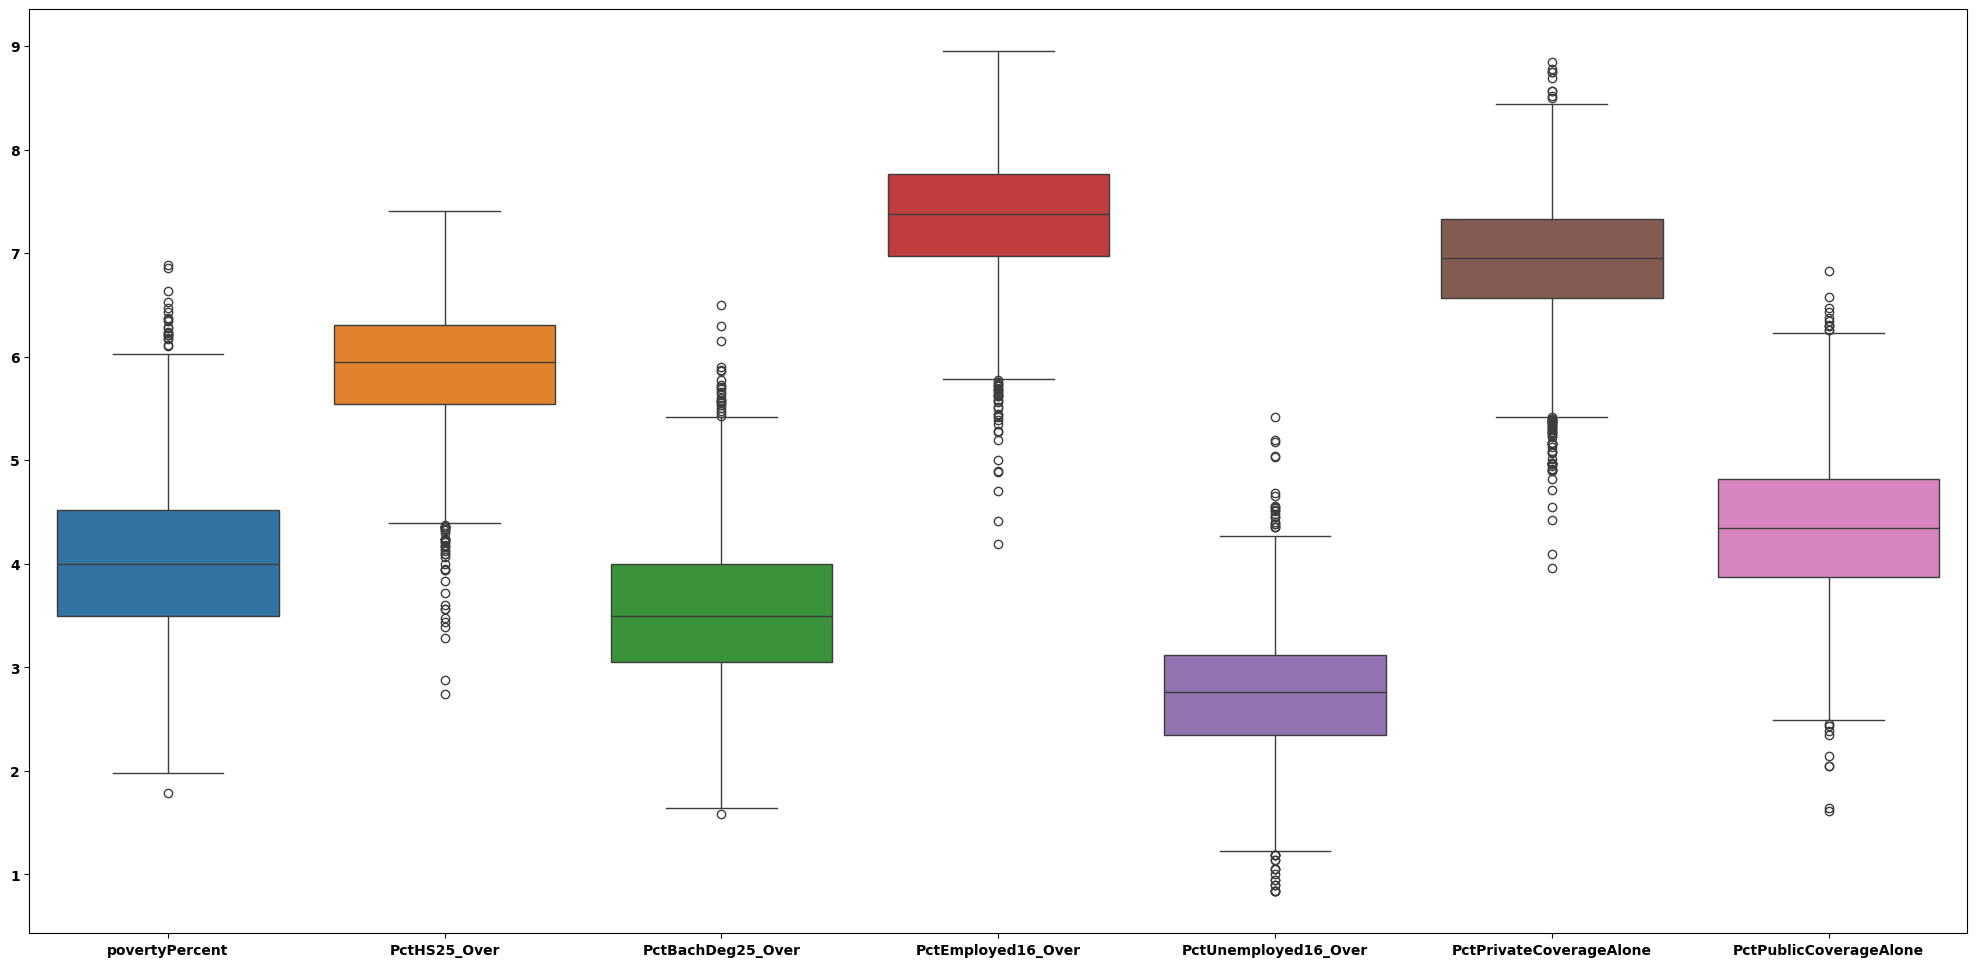

In [30]:
name_cols_pct = ['povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverageAlone', 'PctPublicCoverageAlone']
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df[name_cols_pct], orient="v")

### 2.3.  Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.

Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df[final_features], cancer_df["deathRate"], test_size=0.3, random_state=1)

In [32]:
X_train.shape, y_train.shape

((1411, 9), (1411,))

In [33]:
X_test.shape, y_test.shape

((606, 9), (606,))

## 3. Modelado

### 3.1. Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).

En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

### 3.2. Interpretación de los coeficientes y del intercepto.

Aqui podemos ver que las variables `incidenceRate`, `medIncome` y `PctPrivateCovergaeAlone` no tienen un impacto grande en la estimaacion del promedio de muertes por cancer en un condado. Mientras que `povertyPercent`y `PctHS25_Over`tiene un impacto significativo a la hora de calcular. Finalmente, `PctBachDeg25_Over` impacta negativamente el promedio de muertes.

In [36]:
pd.DataFrame({"columns": final_features, "coef": regression.coef_})

,columns,coef
0,incidenceRate,0.216021
1,medIncome,0.000139
2,povertyPercent,8.147444
3,PctHS25_Over,5.209585
4,PctBachDeg25_Over,-8.951056
5,PctEmployed16_Over,-1.642377
6,PctUnemployed16_Over,1.995697
7,PctPrivateCoverageAlone,0.996323
8,PctPublicCoverageAlone,2.477510


Por otro lado, el intercepto nos esta diciendo el valor base en la estimacion, diciendono que un promedio minimo (cuando todas las varibales de entrada son 0) de muertes dentro de un condado por cada 100.00- habitantes es de aproximadamente de ~33.

In [37]:
regression.intercept_

32.96989246048261

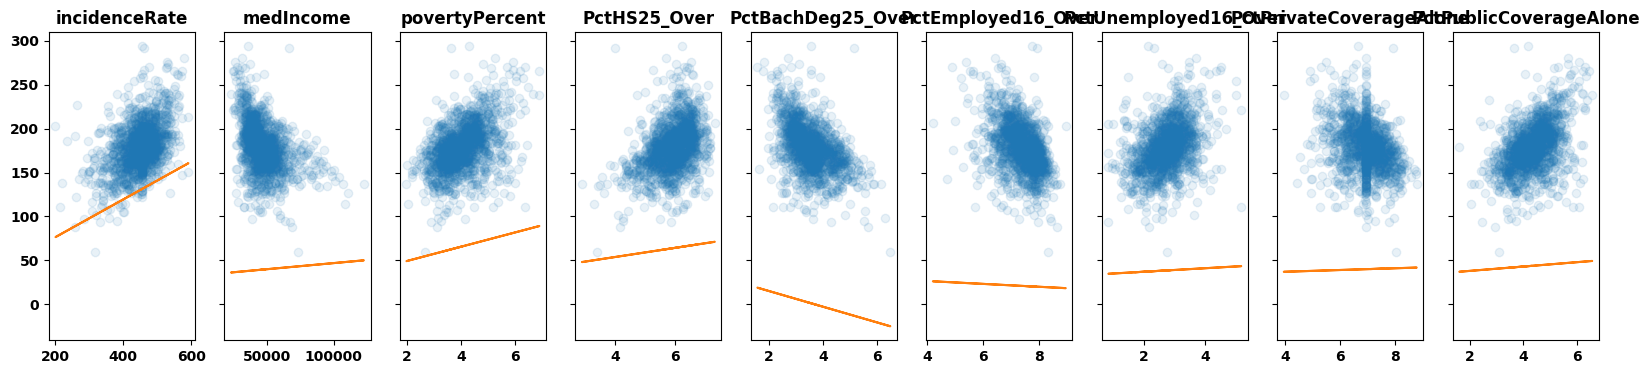

In [38]:
f, axs = plt.subplots(1, len(final_features), sharey=True, figsize=(20, 4))

for i in range(len(final_features)):
    col = final_features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Recuerde que el modelo de regresión lineal para este caso particular está dado de la forma

$$ y = {\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \beta_{4}x_{4} + \beta_{5}x_{5}+ \beta_{6}x_{6} + \beta_{7}x_{7} + \beta_{8}x_{8}} $$

siendo $\beta_{0}$ el intercepto (bias) y $\beta_{1}$ hasta $\beta_{8}$ los coeficientes o parámetros correspondientes a las variables de entrada en el mismo orden.

### 3.3. Validación (evaluación) del modelo
La forma más básica para saber que tan bien se comporta el modelo es midiendo que tanto se alejan las estimaciones o predicciones del mismo respecto a la variable objetivo real. Esta medición se puede hacer tanto para el conjunto de datos de entrenamiento como para el de prueba

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [39]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 15.158688498797142
Test: 13.721177260027991


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [40]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 20.548003390863755
Test: 18.69104275419333


### 3.3.1. Análisis del error

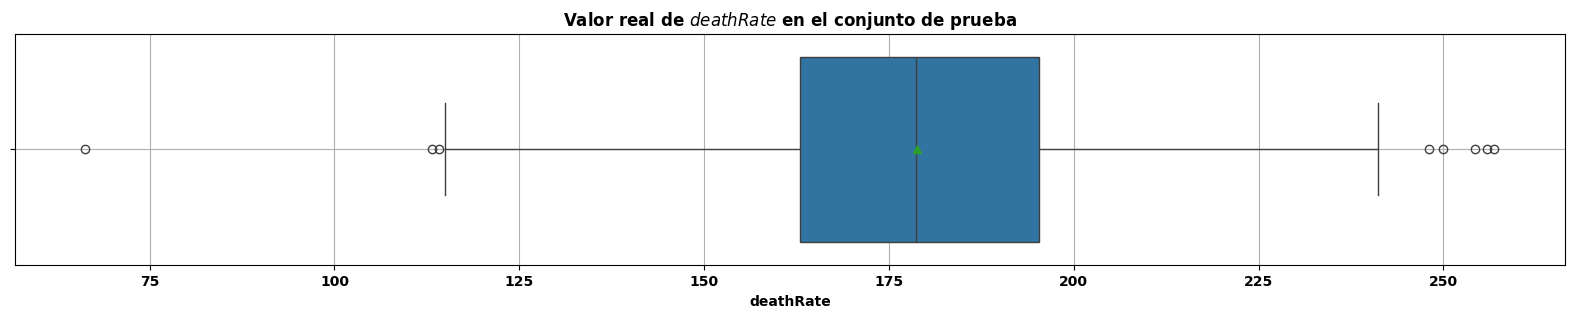

In [41]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{deathRate}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [42]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    606.000000
mean     178.751980
std       25.182128
min       66.300000
25%      162.950000
50%      178.700000
75%      195.300000
99%      239.245000
max      256.900000
Name: deathRate, dtype: float64

Aqui podemos percibir que aunque `deathRate` se encuentre en un rango [66, 257], la mayoria de sus resultados se encuentran entre [~115, ~240]. 

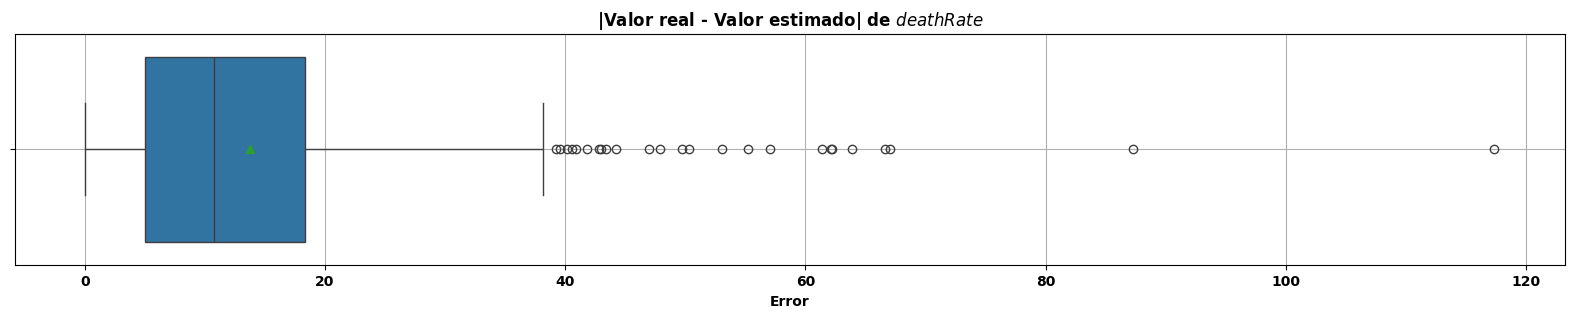

In [43]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{deathRate}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [44]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    606.000000
mean      13.721177
std       12.702387
min        0.050410
25%        5.000355
50%       10.739457
75%       18.326863
95%       35.990022
99%       62.116102
max      117.353473
Name: deathRate, dtype: float64

Lo que se puede evidenciar del modelo de regresion es lo siguiente:
1) El MAE en el conjunto de pruebas (13.72) es menor que en el conjunto de entrenamiento (15.16), lo que sugiere que el modelo generaliza bien a datos nuevos (conjunto de pruebas) y no está sobreajustando demasiado los datos de entrenamiento.
2) El RMSE en el conjunto de pruebas (18.69) es menor que en el conjunto de entrenamiento (20.55), lo que sugiere una buena generalización del modelo.
3) Para el conjunto de prueba los valores de la variable objetivo están centrados en  178.7±5.1, mientras que el 75% de los errores de estimación del modelo se encuentran por debajo de 18.32,  lo cual significa que esos errores de estimación son significativamente mayores que la variabilidad natural de los datos.

En conclusion, aunque el modelo parece generalizar bien y tiene un rendimiento aceptable en el conjunto de pruebas, los errores de estimación son relativamente grandes en comparación con la variabilidad natural de los datos, lo que indica que podría haber margen para mejorar la precisión del modelo.

In [45]:
residuos = y_test-regression.predict(X_test)
mae = mean_absolute_error(y_test, regression.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, regression.predict(X_test)))

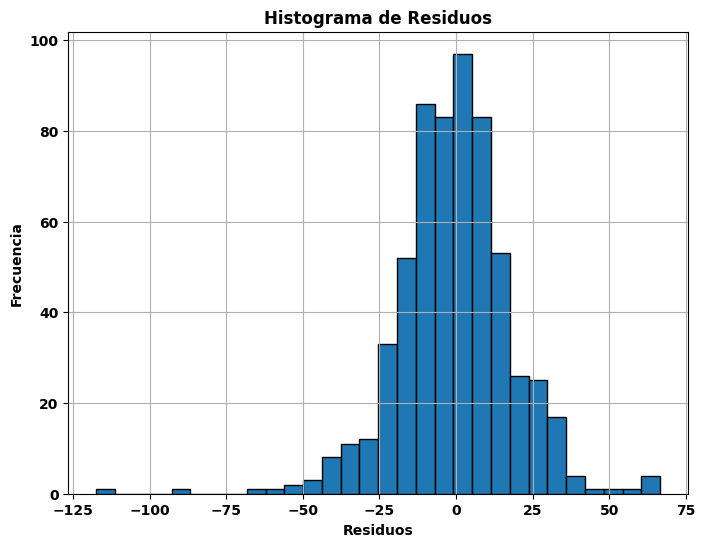

In [46]:
# Visualizar histograma de residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()

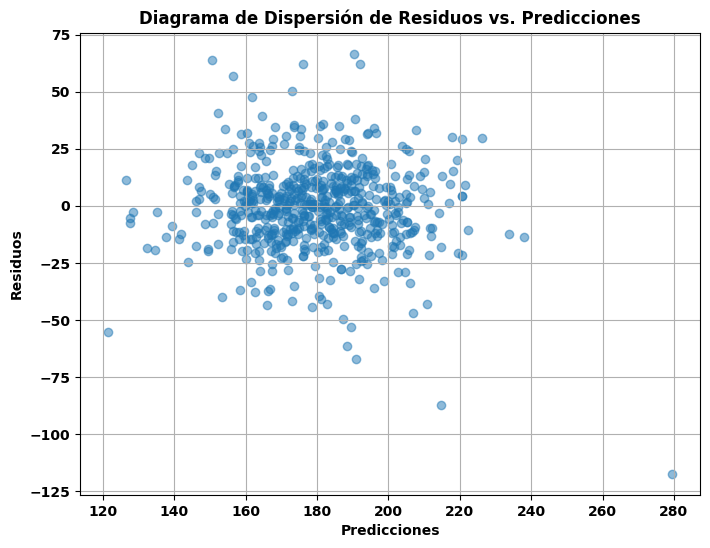

In [47]:
# Visualizar diagrama de dispersión de residuos vs. predicciones
plt.figure(figsize=(8, 6))
plt.scatter(regression.predict(X_test), residuos, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Diagrama de Dispersión de Residuos vs. Predicciones')
plt.grid(True)
plt.show()

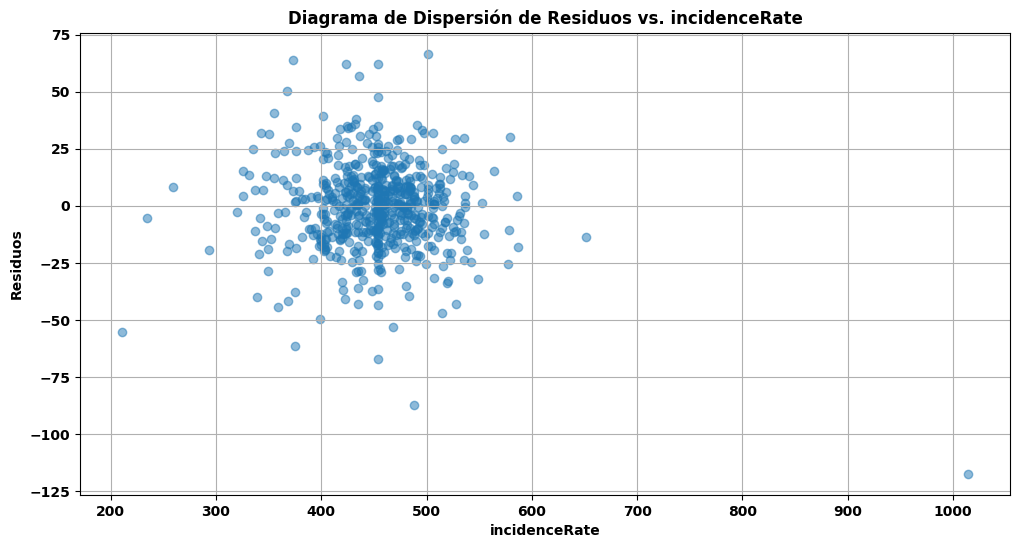

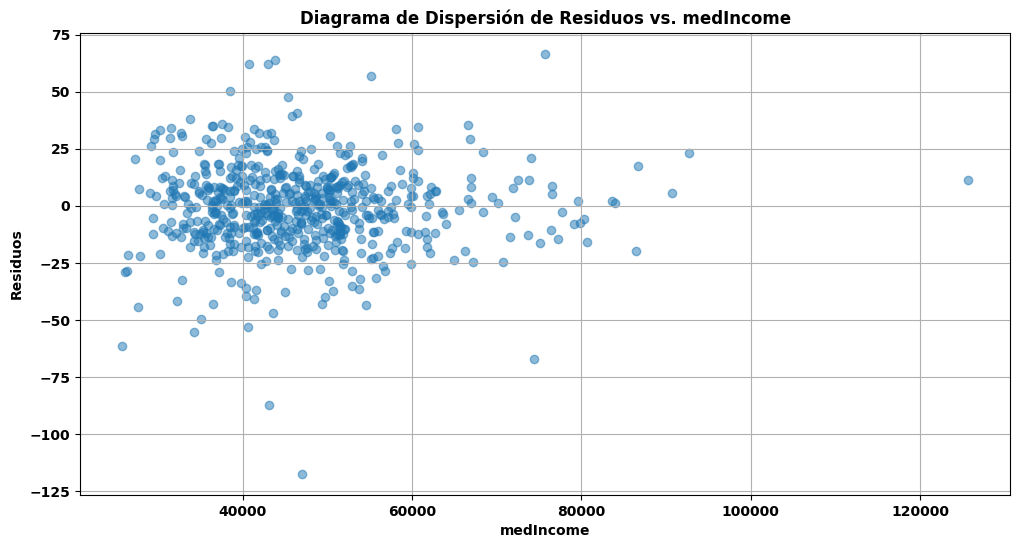

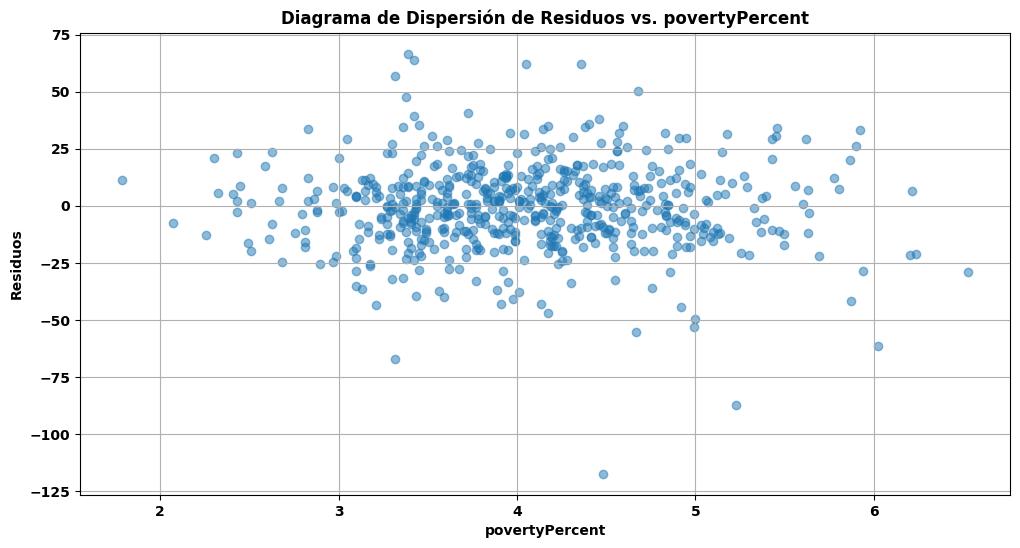

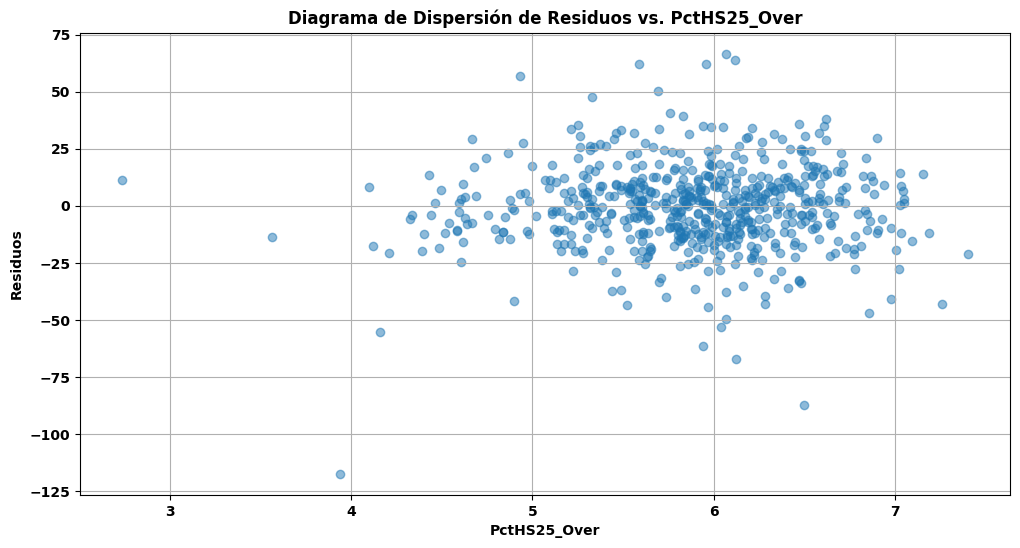

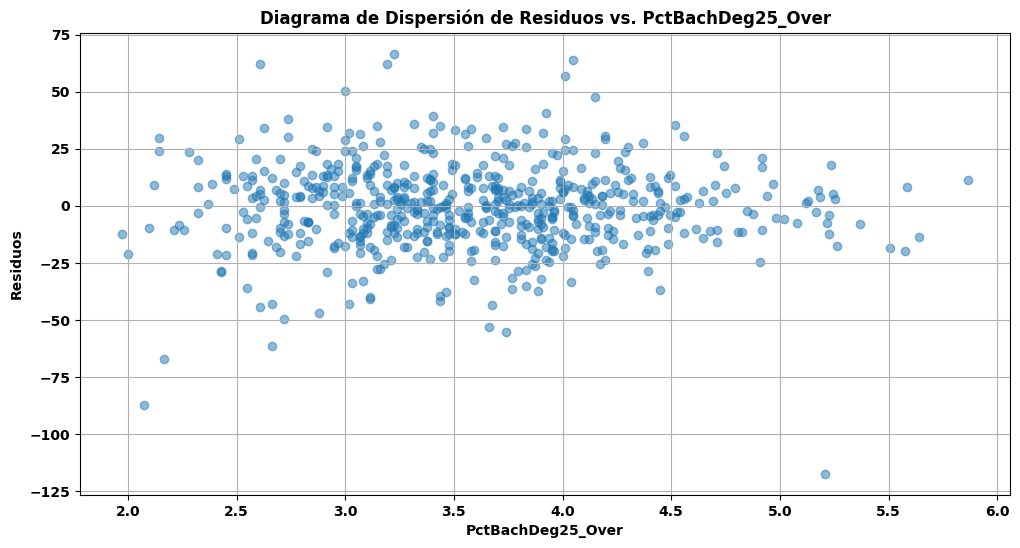

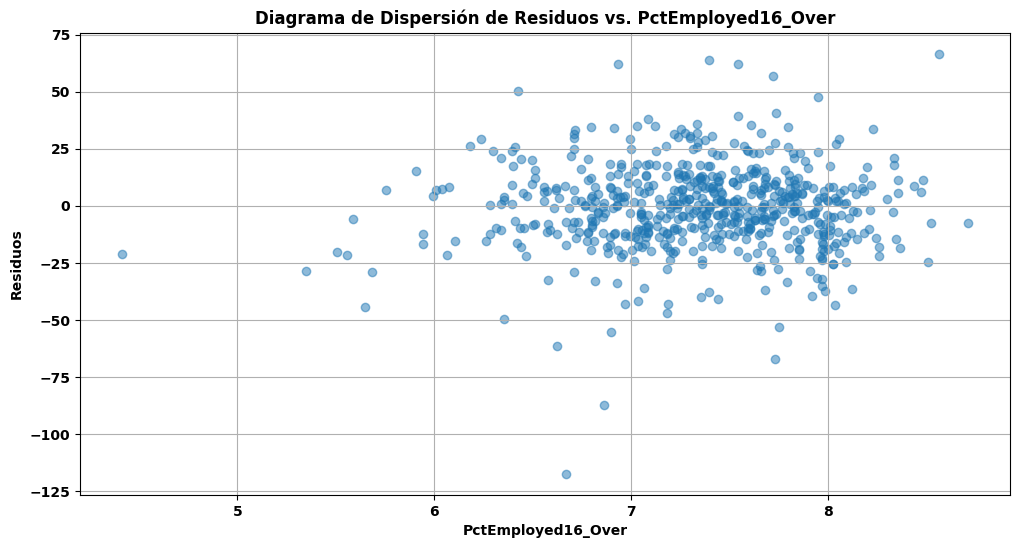

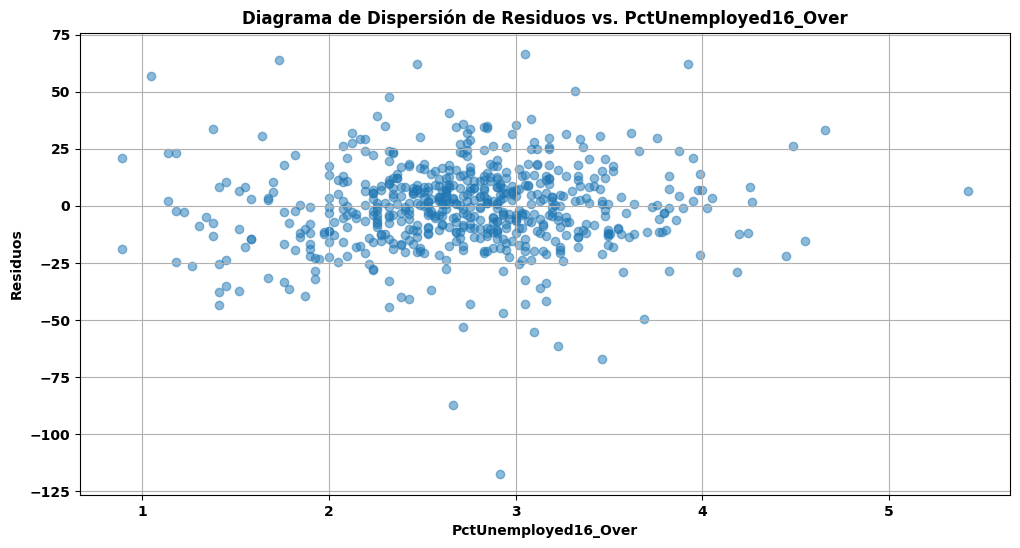

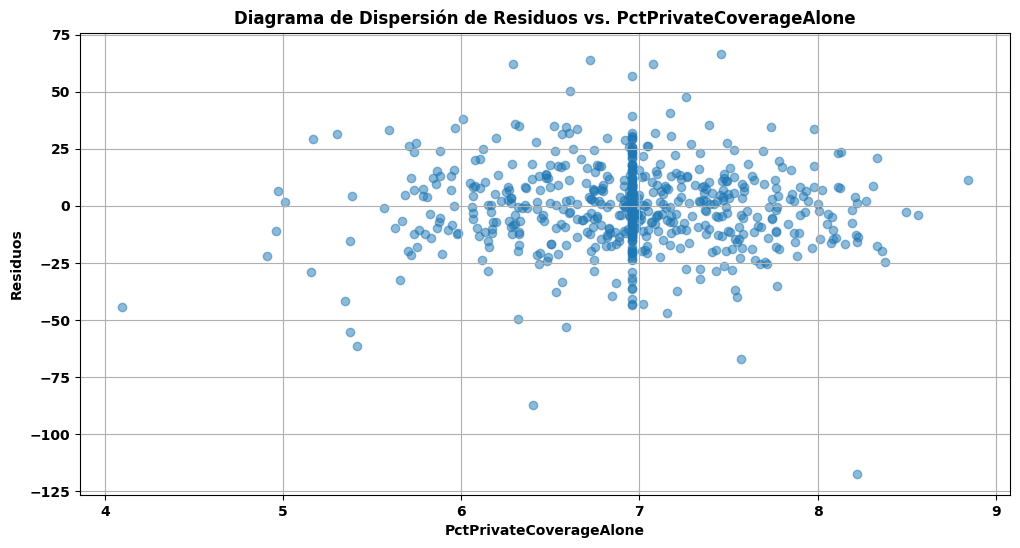

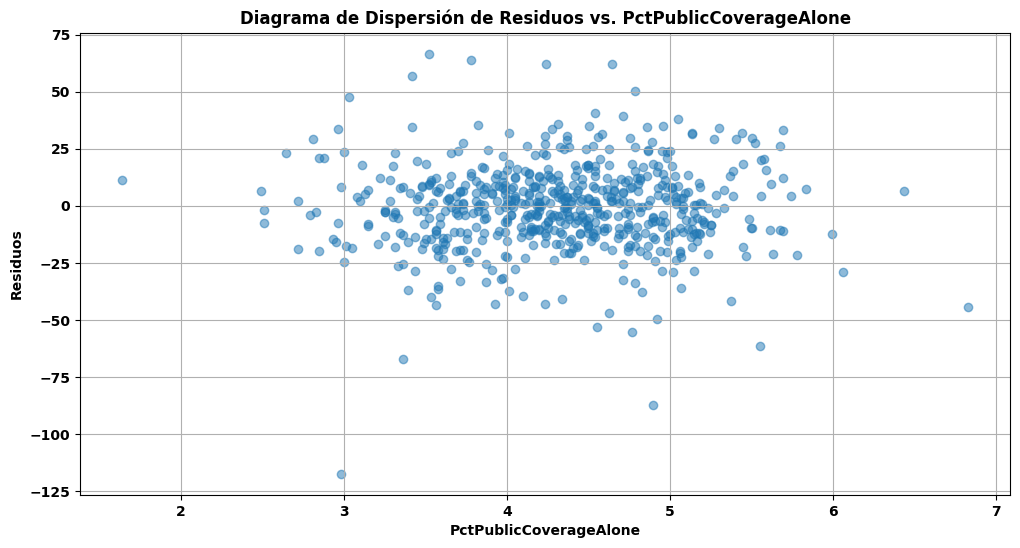

In [48]:
# Análisis de residuos por variables independientes (ejemplo para una variable independiente)
for feature in X_test.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test[feature], residuos, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.title(f'Diagrama de Dispersión de Residuos vs. {feature}')
    plt.grid(True)
    plt.show()

In [49]:
# Identificar casos atípicos (mayores residuos absolutos)
outliers = residuos.abs().nlargest(10).index
print("Casos atípicos (mayores residuos absolutos):")
print(X_test.loc[outliers])

Casos atípicos (mayores residuos absolutos):
      incidenceRate  medIncome  povertyPercent  PctHS25_Over  \
606     1014.200000      46954        4.483302      3.937004   
1810     488.400000      43115        5.224940      6.496153   
1543     453.549422      74347        3.316625      6.123724   
193      501.100000      75682        3.391165      6.066300   
1845     373.300000      43859        3.420526      6.115554   
1450     453.549422      40714        4.358899      5.585696   
1266     423.900000      42953        4.049691      5.958188   
652      374.800000      25807        6.024948      5.941380   
562      435.700000      55177        3.316625      4.929503   
363      211.100000      34258        4.669047      4.159327   

      PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
606            5.205766            6.670832              2.915476   
1810           2.073644            6.862944              2.664583   
1543           2.167948            7.733046

## 4. Entrenamiento de un segundo modelo aplicando normalización (Pipeline)

Scikit-Learn permite integrar el proceso de selección y preparación de variables (features) dentro de los procesos de entrenamiento y predicción de los modelos mediante el uso de Pipelines. Un Pipeline permite ejecutar de forma secuencial un conjunto de transformaciones de datos, selección de variables, entre otros, seguido del paso de entrenamiento o predicción.

In [50]:
#Este código crea un pipeline que aplica un escalado estándar a las características del conjunto de datos
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [53]:
#Este código entrena el pipeline utilizando el conjunto de entrenamiento de características (X_train) y la variable objetivo (y_train).
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [48]:
#Se crea un DataFrame que contiene los coeficientes del modelo de regresión lineal entrenado, relacionando cada coeficiente con su respectiva característica.
pd.DataFrame({"columns": final_features, "coef": pipeline["model"].coef_})

,columns,coef
0,incidenceRate,11.479778
1,medIncome,1.708259
2,povertyPercent,6.246426
3,PctHS25_Over,3.218625
4,PctBachDeg25_Over,-6.413388
5,PctEmployed16_Over,-0.983342
6,PctUnemployed16_Over,1.232662
7,PctPrivateCoverageAlone,0.657059
8,PctPublicCoverageAlone,1.756076


In [54]:
#Este código devuelve el valor del término de intercepción del modelo de regresión lineal entrenado en el pipeline.
pipeline["model"].intercept_

179.11332388377036

In [55]:
#Este código calcula la media de los valores de la variable objetivo (y) en los conjuntos de datos de entrenamiento (y_train) y prueba (y_test), respectivamente.
y_train.mean(), y_test.mean()

(179.11332388377036, 178.7519801980198)

Aunque tras la transformación de las variables de entrada se pierde un poco de interpretabilidad de los datos, los coeficientes de la regresión ahora son directamente comparables, pudiendo decir que la variable de entrada que mayor tiene impacto en la variable objetivo es `incidenceRate`, muy por encima de `medIncome` que es la siguiente en magnitud. No se debe olvidar los coeficientes negativos, particularmente el correspondiente a la variable `PctBachDeg25_Over`, el cuál tiene una magnitud alta muy similar a `povertyPercent` en términos de valor absoluto.

La forma de entender el intercepto también cambia un poco. Al haber normalizado las variables de entrada, particularmente al haber centrado cada variable en cero removiendo su valor promedio, el valor del intercepto indica el promedio minimo (cuando todas las varibales de entrada son 0) de muertes dentro de un condado por cada 100 habitantes. Esto tiene sentido dado que corresponde con el valor promedio real (aproximado) de `deathRate` tanto para el conjunto de entrenamiento como para el de prueba.

In [56]:
#Este código imprime las métricas de error MAE (Mean Absolute Error) y RMSE (Root Mean Squared Error) para el conjunto de entrenamiento y el conjunto de prueba. Se utilizan las predicciones del modelo entrenado en el pipeline sobre los conjuntos de características X_train y X_test para calcular estas métricas de error al compararlas con los valores reales de la variable objetivo y_train y y_test, respectivamente.
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 15.158688498797137
Test: 13.72117726002799

RMSE:
Train: 20.54800339086375
Test: 18.691042754193326


Hay que recordar que el uso de los pipelines para la normalización de datos no implica que se mejoren las métricas de error como es nuestro caso pero si nos da un mejor proceso de entrenamiento por parte del algoritmo.

Por ultimo se exportará el pipeline en formato .jotlib 

## 5. Validación de supuestos de la regresión

El modelo de regresión lineal, desde una perspectiva clásica, debería además cumplir con los siguientes supuestos:

*Se volverán a revisar algunos aspectos que se habían descubierto en la etapa de entendimiento de los datos.*

### 5.1. Colinealidad

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<Axes: >

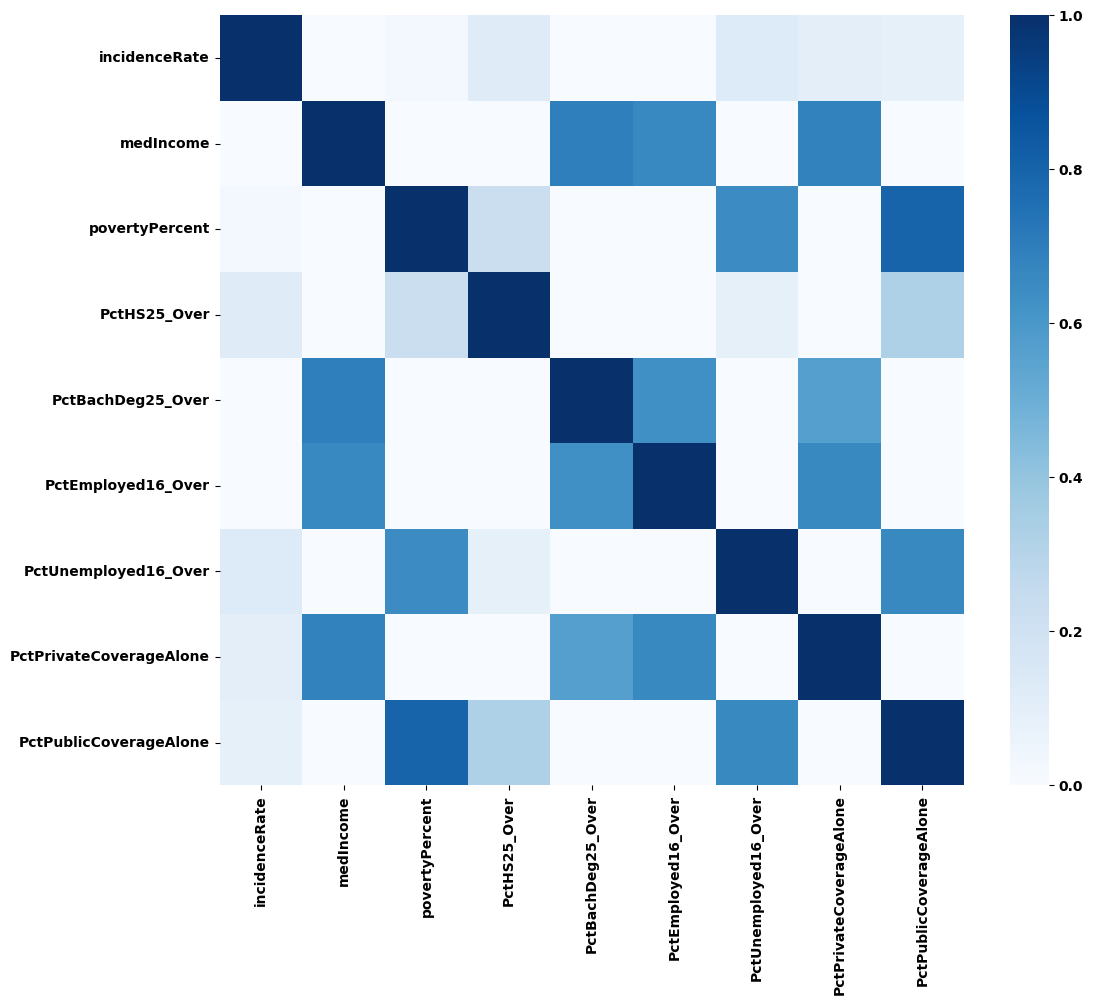

In [57]:
#Este código crea un mapa de calor (heatmap) utilizando la biblioteca Seaborn (sns) para visualizar la matriz de correlación entre las características del conjunto de entrenamiento (X_train). El colormap utilizado es "Blues" y los valores de correlación se encuentran en el rango de 0 a 1. El tamaño de la figura es de 12x10 pulgadas.
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [58]:
#Este código calcula la matriz de correlación entre las características del conjunto de entrenamiento (X_train).
X_train.corr()

,incidenceRate,medIncome,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverageAlone,PctPublicCoverageAlone
incidenceRate,1.000000,-0.007416,0.027269,0.124517,-0.033355,-0.025050,0.132424,0.099292,0.089100
medIncome,-0.007416,1.000000,-0.822314,-0.490086,0.698244,0.661918,-0.435392,0.684834,-0.730765
povertyPercent,0.027269,-0.822314,1.000000,0.229260,-0.590724,-0.738761,0.648329,-0.697591,0.799928
PctHS25_Over,0.124517,-0.490086,0.229260,1.000000,-0.739346,-0.361151,0.089077,-0.254033,0.326393
PctBachDeg25_Over,-0.033355,0.698244,-0.590724,-0.739346,1.000000,0.631281,-0.386883,0.569326,-0.634206
PctEmployed16_Over,-0.025050,0.661918,-0.738761,-0.361151,0.631281,1.000000,-0.629168,0.657680,-0.693460
PctUnemployed16_Over,0.132424,-0.435392,0.648329,0.089077,-0.386883,-0.629168,1.000000,-0.512453,0.656993
PctPrivateCoverageAlone,0.099292,0.684834,-0.697591,-0.254033,0.569326,0.657680,-0.512453,1.000000,-0.751273
PctPublicCoverageAlone,0.089100,-0.730765,0.799928,0.326393,-0.634206,-0.693460,0.656993,-0.751273,1.000000


Para ajustar esto decidimos eliminar las variables con una correlación mayor al % obteniendo las siguientes columnas.

In [59]:
#Este código calcula la matriz de correlación entre un conjunto específico de características seleccionadas del conjunto de entrenamiento (X_train). Las características seleccionadas son "incidenceRate", "povertyPercent", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over" y "PctPrivateCoverageAlone".
new_features = ["incidenceRate", "povertyPercent", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverageAlone",]

X_train[new_features].corr()

,incidenceRate,povertyPercent,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverageAlone
incidenceRate,1.000000,0.027269,-0.033355,-0.025050,0.132424,0.099292
povertyPercent,0.027269,1.000000,-0.590724,-0.738761,0.648329,-0.697591
PctBachDeg25_Over,-0.033355,-0.590724,1.000000,0.631281,-0.386883,0.569326
PctEmployed16_Over,-0.025050,-0.738761,0.631281,1.000000,-0.629168,0.657680
PctUnemployed16_Over,0.132424,0.648329,-0.386883,-0.629168,1.000000,-0.512453
PctPrivateCoverageAlone,0.099292,-0.697591,0.569326,0.657680,-0.512453,1.000000


In [60]:
#Este código entrena el pipeline utilizando un conjunto específico de características seleccionadas (new_features) del conjunto de entrenamiento (X_train) y la variable objetivo (y_train).
pipeline.fit(X_train[new_features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [61]:
#Este código crea un DataFrame que contiene los coeficientes del modelo de regresión lineal entrenado, relacionando cada coeficiente con su respectiva característica seleccionada en el conjunto de entrenamiento (new_features).
pd.DataFrame({"columns": new_features, "coef": pipeline["model"].coef_})

,columns,coef
0,incidenceRate,11.938926
1,povertyPercent,4.980775
2,PctBachDeg25_Over,-9.167919
3,PctEmployed16_Over,-1.272131
4,PctUnemployed16_Over,1.420678
5,PctPrivateCoverageAlone,0.616014


In [62]:
#Este código devuelve el valor del término de intercepción del modelo de regresión lineal entrenado en el pipeline.
pipeline["model"].intercept_

179.11332388377036

In [63]:
#Este código imprime las métricas de error MAE (Mean Absolute Error) y RMSE (Root Mean Squared Error) para el conjunto de entrenamiento y el conjunto de prueba utilizando el modelo entrenado en el pipeline con las características seleccionadas (new_features). Se utilizan las predicciones del modelo sobre los conjuntos de características X_train[new_features] y X_test[new_features] para calcular estas métricas de error al compararlas con los valores reales de la variable objetivo y_train y y_test, respectivamente.
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[new_features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[new_features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[new_features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[new_features]))))

MAE:
Train: 15.30846015736427
Test: 13.87175089483587

RMSE:
Train: 20.64735591404833
Test: 18.90074023970209


Se pueden sacar varias conclusiones de lo visto anteriormente:
1. Usando un menor numro de columnas (variables de entrada) obtenemos unos resultados muy similares al modelo inicial en cuanto al error se habla.
2. Las variables se dividen en cuatro grupos con coeficientes similares entre los miembros de los grupos pero muy ditantes entre grupos por lo que tenemos un desbalance aún moderadamente grande. Los grupos son:
   - PctEmployed16_Over y PctPrivateCoverageAlone
   - povertyPercent y PctUnemployed16_Over
   - incidenceRate 
   - PctBachDeg25_Over

### 5.2. Linealidad
La relación entre las variables de entrada y la variable objetivo debe ser lineal

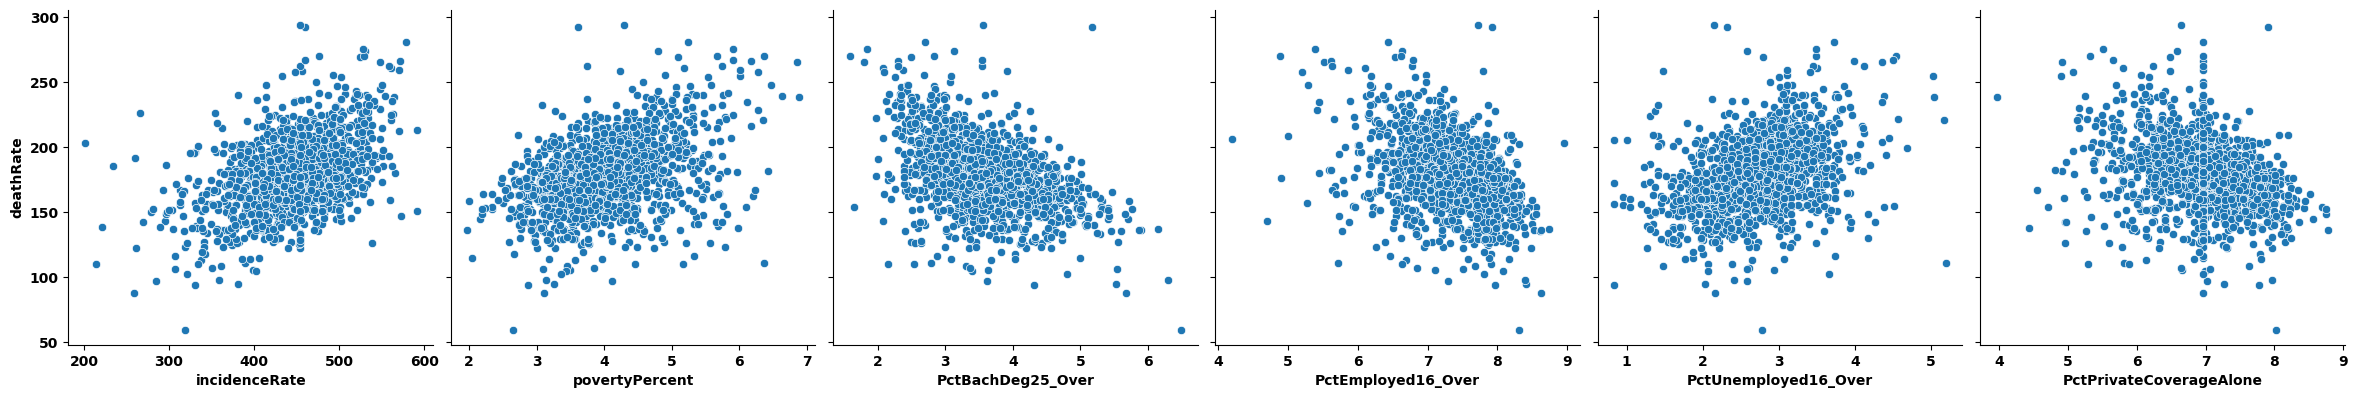

In [64]:
#Este código crea un gráfico de pares (pairplot) utilizando la biblioteca Seaborn (sns) para visualizar las relaciones entre la variable objetivo "deathRate" y un conjunto específico de características seleccionadas (new_features) en el conjunto de entrenamiento (X_train). El gráfico de pares muestra gráficos de dispersión de las relaciones entre "deathRate" y cada una de las características seleccionadas. El conjunto de datos utilizado se concatena a lo largo del eje de las columnas (axis=1) para incluir tanto las características como la variable objetivo. El tamaño del gráfico se establece en 4 pulgadas de altura (height=4).
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="deathRate", x_vars=new_features, kind="scatter")

### 5.3. Normalidad de los errores

Los errores deben tener una distribución normal.

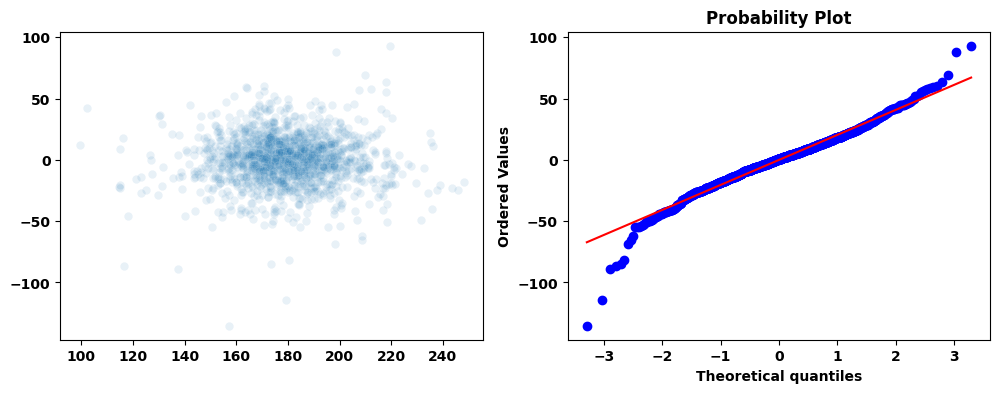

In [65]:
# Calcula los errores
errors = (pipeline.predict(X_train[new_features]) - y_train).values

# Crea una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de dispersión de predicciones vs. errores
sns.scatterplot(x=pipeline.predict(X_train[new_features]), y=errors, alpha=0.1, ax=axes[0])

# Q-Q plot para visualizar la normalidad de los errores
_ = stats.probplot(errors, dist="norm", plot=axes[1])


Una estrategia común para el mejoramiento de este supuesto es eliminar los valores atípicos de la variable objetivo.

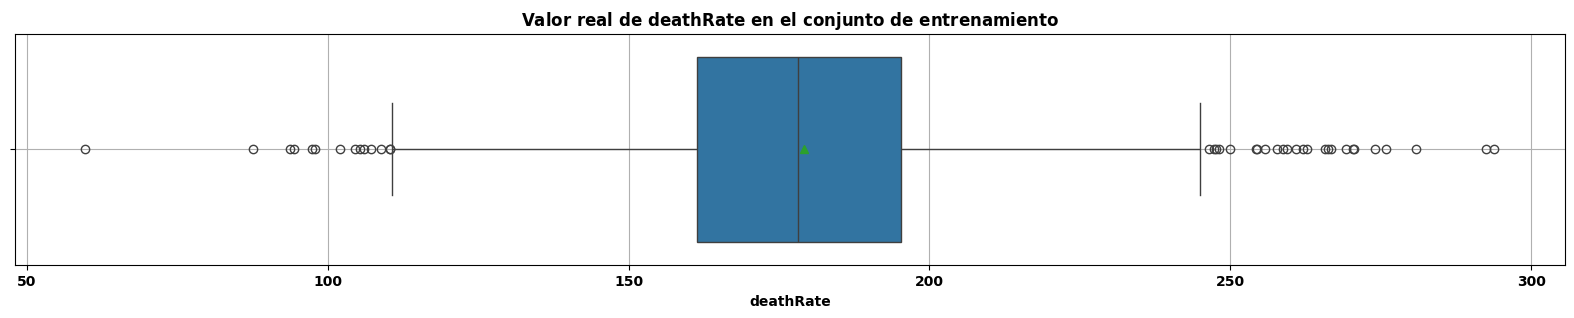

In [66]:
# Crea una figura con tamaño personalizado
plt.figure(figsize=(20, 3))

# Crea un boxplot horizontal de la variable objetivo
sns.boxplot(x=y_train, showmeans=True, orient="h")

# Establece el título del gráfico
plt.title("Valor real de $\\text{deathRate}$ en el conjunto de entrenamiento")

# Agrega una cuadrícula al gráfico
plt.grid()

# Muestra el gráfico
plt.show()

Una herramienta para saber que valores se deben eliminar es $$outlier > Q3 + 1.5*IQR$$

In [68]:
#Este código calcula el valor del umbral utilizando el rango intercuartílico (IQR) para identificar los valores atípicos en la variable objetivo y_train.
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

246.225

In [69]:
#Este código filtra los valores atípicos en el conjunto de datos de entrenamiento.
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [70]:
#Este código realiza una operación similar al filtrado de valores atípicos, pero esta vez en el conjunto de datos de prueba.
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [71]:
#Este código entrena el pipeline utilizando un conjunto específico de características seleccionadas (`new_features`) del conjunto de entrenamiento (`X_train`) y la variable objetivo (`y_train`). El pipeline se ajusta para aprender la relación entre las características seleccionadas y la variable objetivo utilizando un modelo de regresión lineal.
pipeline.fit(X_train[new_features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [72]:
#Este código crea un DataFrame que contiene los coeficientes del modelo de regresión lineal entrenado en el pipeline, relacionando cada coeficiente con su respectiva característica seleccionada en el conjunto de entrenamiento (`new_features`). Los coeficientes representan la importancia o contribución de cada característica en la predicción de la variable objetivo.
pd.DataFrame({"columns": new_features, "coef": pipeline["model"].coef_})

,columns,coef
0,incidenceRate,11.056243
1,povertyPercent,3.397075
2,PctBachDeg25_Over,-9.466220
3,PctEmployed16_Over,-0.555324
4,PctUnemployed16_Over,2.021033
5,PctPrivateCoverageAlone,0.520657


In [73]:
#Este código imprime las métricas de evaluación del modelo de regresión lineal entrenado en el pipeline utilizando el conjunto de características seleccionadas (`new_features`) tanto para el conjunto de entrenamiento (`X_train`) como para el conjunto de prueba (`X_test`). Las métricas incluyen el error absoluto medio (MAE) y la raíz del error cuadrático medio (RMSE) para ambos conjuntos de datos. Estas métricas proporcionan información sobre el rendimiento del modelo en la predicción de la variable objetivo.
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[new_features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[new_features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[new_features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[new_features]))))

MAE:
Train: 14.682726128355876
Test: 13.568845945987416

RMSE:
Train: 19.2527495246537
Test: 18.33723466963524


In [74]:
#Este código calcula los errores residuales del modelo de regresión lineal para el conjunto de entrenamiento.
errors = (pipeline.predict(X_train[new_features])-y_train).values

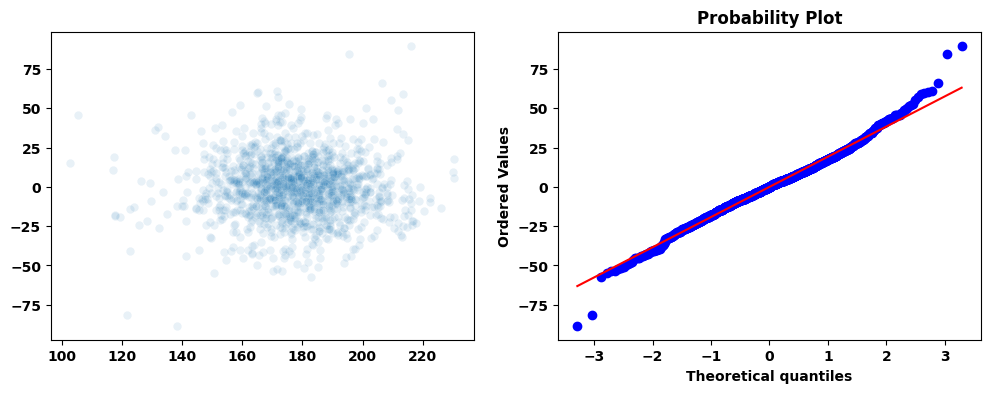

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[new_features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Se tienee una mejora en las metricas de error y se normalizán los errores.

### 5.4 Varianza constante (Homocedasticidad)

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

<Axes: >

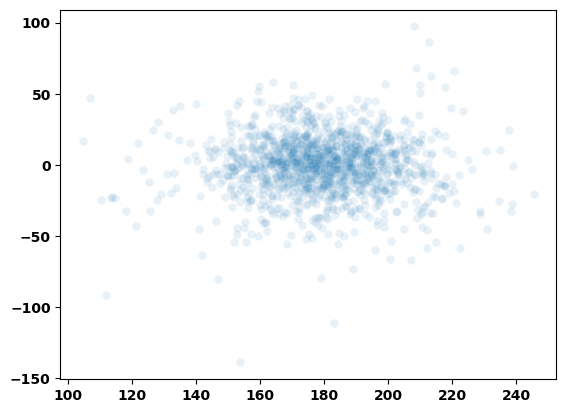

In [64]:
sns.scatterplot(x = pipeline.predict(X_train[new_features]), y=errors, alpha=0.1)

Como es nuestro caso, existe una Homocedasticidad de los datos observables en la grafica.

## 6. Persistencia del modelo
Una vez que el modelo está list lo pondremos en un archivo joblib para lograr su persistencia.io.

In [66]:
joblib.dump(pipeline, './data/pipeline_model.joblib')

['./data/pipeline_model.joblib']